# What is the average depreciation rate for cars of different makes? #

### Import the data, dependencies, conver saledate into saleyear, and view data ###

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
pd.set_option('display.max_columns', 500)
str_path_file = "Data/clean_car_prices.csv"
df_clean_car_prices = pd.read_csv(str_path_file)
int_clean_car_prices_checksum = 472325
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}")

Dataframe import size 558705 rows, clean checksum is 472325, run at 2024-03-25 09:52:39.779834


# Make Analysis #

In [2]:
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] > 1) ]
df_clean_car_prices = df_clean_car_prices[(df_clean_car_prices['age_when_sold'] < 11) ]
print(f"Dataframe import size {len(df_clean_car_prices)} rows, clean checksum is {int_clean_car_prices_checksum}, run at {datetime.datetime.now()}.  Difference is only cars between 1 and 10 years old are used, inclusive")

Dataframe import size 402517 rows, clean checksum is 472325, run at 2024-03-25 09:52:40.332494.  Difference is only cars between 1 and 10 years old are used, inclusive


### age_when_sold_grouped_df ###

In [3]:
age_when_sold_grouped_df = df_clean_car_prices.groupby(['make', 'age_when_sold'])['sellingprice'].mean().reset_index()
age_when_sold_grouped_df.rename(columns={'sellingprice': 'meansellingprice'}, inplace=True)
print(datetime.datetime.now())
print(f"The age_when_sold_grouped_df dataframe has {len(age_when_sold_grouped_df)} records.")
age_when_sold_grouped_df.head()

2024-03-25 09:52:40.556224
The age_when_sold_grouped_df dataframe has 387 records.


,make,age_when_sold,meansellingprice
0,acura,2,21796.979167
1,acura,3,20473.992995
2,acura,4,20077.881041
3,acura,5,16573.373984
4,acura,6,13768.600000


In [4]:
# Assuming grouped_df is your DataFrame with columns 'make', 'age_when_sold', and 'sellingprice'

# Filter grouped_df for specific makes
selected_makes = ['ford', 'chevrolet', 'nissan', 'toyota']

df_age_when_sold_grouped_df_FCNT = age_when_sold_grouped_df[age_when_sold_grouped_df['make'].isin(selected_makes)]
df_age_when_sold_grouped_df_FCNT = df_age_when_sold_grouped_df_FCNT[df_age_when_sold_grouped_df_FCNT['age_when_sold'] > 1]

# Display the filtered DataFrame
print(datetime.datetime.now())
print(f"The df_age_when_sold_grouped_df_FCNT dataframe has {len(df_age_when_sold_grouped_df_FCNT)} records.")
df_age_when_sold_grouped_df_FCNT.head()

2024-03-25 09:52:40.678102
The df_age_when_sold_grouped_df_FCNT dataframe has 36 records.


,make,age_when_sold,meansellingprice
60,chevrolet,2,14197.340237
61,chevrolet,3,13086.515445
62,chevrolet,4,12571.617838
63,chevrolet,5,10936.743407
64,chevrolet,6,9373.161249


In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)
formatter = FuncFormatter(dollar_format)

The rvalue is -0.96; the slope is -1402.93.


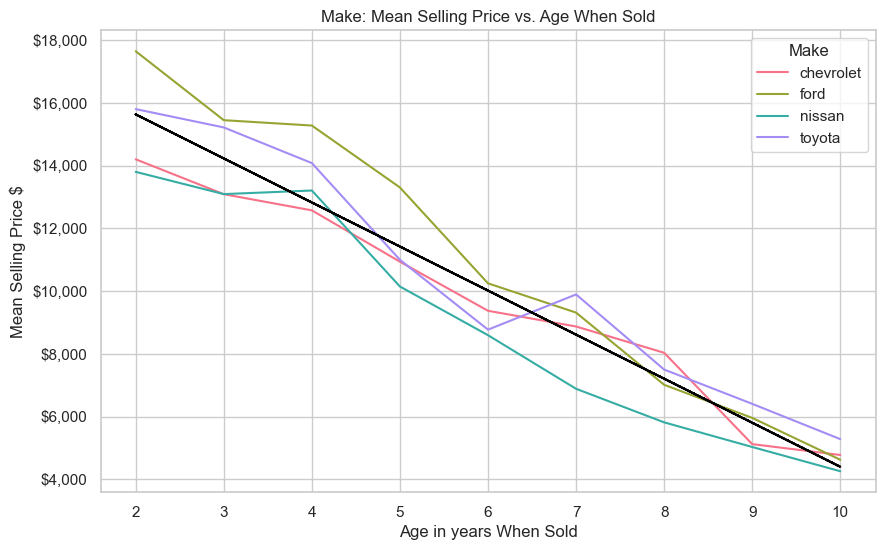

In [10]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_age_when_sold_grouped_df_FCNT, x='age_when_sold', y='meansellingprice', hue='make', palette='husl')

#Regression line
x_values=df_age_when_sold_grouped_df_FCNT['age_when_sold']
y_values=df_age_when_sold_grouped_df_FCNT['meansellingprice']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept

# Set the title and labels
plt.title('Make: Mean Selling Price vs. Age When Sold')
plt.xlabel('Age in years When Sold')
plt.ylabel('Mean Selling Price $')

plt.gca().yaxis.set_major_formatter(formatter)

plt.plot(x_values, regress_values, color='black', linestyle=':')

# Display the plot
plt.legend(title='Make', loc='upper right')
print(f"The rvalue is {round(rvalue,2)}; the slope is {round(slope,2)}.")
plt.show()

In [6]:
# Create age ranges like '1_2'
age_when_sold_grouped_df['age_range'] =  (age_when_sold_grouped_df['age_when_sold'] - 1).astype(str)    + '_' +  age_when_sold_grouped_df['age_when_sold'].astype(str) 

# Calculate mean selling price for each make and age_range group
df_change_price_age_when_sold_grouped = age_when_sold_grouped_df.groupby(['make', 'age_range']).mean().reset_index()

# Calculate percentage change in mean selling price for each make
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'] = df_change_price_age_when_sold_grouped.groupby('make')['meansellingprice'].pct_change() * 100

# Remove NaN values resulting from the first row of each group
df_change_price_age_when_sold_grouped.dropna(subset=['Percent_change_meansellingprice'], inplace=True)

# Convert percentage change to floating-point number after stripping '%'
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice_float'] = df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'].replace('%', '', regex=True).astype(float)

# Format the percentage change column
df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'] = df_change_price_age_when_sold_grouped['Percent_change_meansellingprice'].map(lambda x: f"{x:.2f}%")

In [7]:
selected_makes = ['ford', 'chevrolet', 'nissan', 'toyota']
df_change_price_age_when_sold_grouped_f_C_N_T = df_change_price_age_when_sold_grouped[df_change_price_age_when_sold_grouped['make'].isin(selected_makes)]

print(datetime.datetime.now())
print(f"The df_change_price_age_when_sold_grouped_f_C_N_T dataframe has {len(df_change_price_age_when_sold_grouped_f_C_N_T)} records.")

2024-03-25 09:52:43.755741
The df_change_price_age_when_sold_grouped_f_C_N_T dataframe has 32 records.


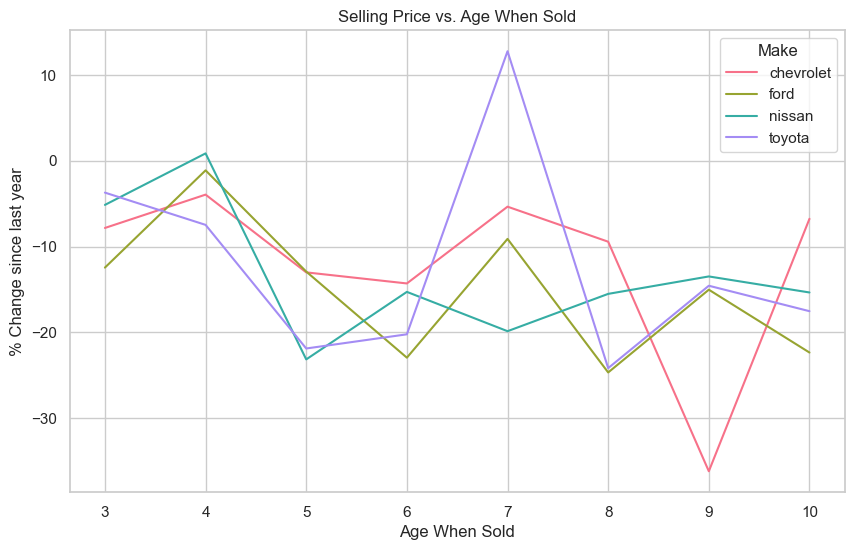

2024-03-25 09:52:45.674432


In [8]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_change_price_age_when_sold_grouped_f_C_N_T, x='age_when_sold', y='Percent_change_meansellingprice_float', hue='make', palette='husl')

# Set the title and labels
plt.title('Selling Price vs. Age When Sold')
plt.xlabel('Age When Sold')
plt.ylabel('% Change since last year')

# Display the plot
plt.legend(title='Make', loc='upper right')
plt.show()
print(datetime.datetime.now())